In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, precision_score,roc_curve, recall_score, precision_recall_curve

import os


In [6]:

import warnings 
warnings.filterwarnings("ignore")

In [2]:
input = pd.read_csv("E:/data/winequality-red.csv")
input.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
input.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
input.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

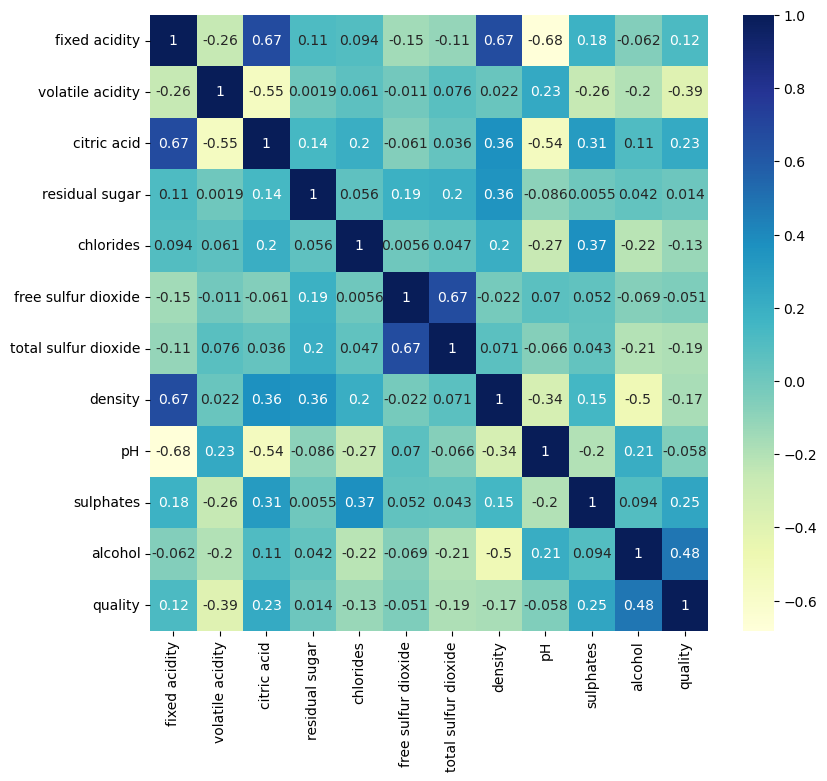

In [6]:
corr = input.corr()
plt.figure(figsize=(9,8))
sns.heatmap(corr, cmap="YlGnBu", annot = True)
plt.show()

<Axes: xlabel='quality', ylabel='count'>

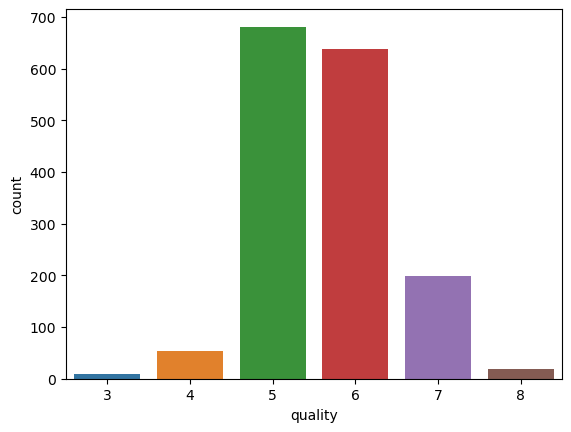

In [11]:
sns.countplot(x='quality', data=input)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

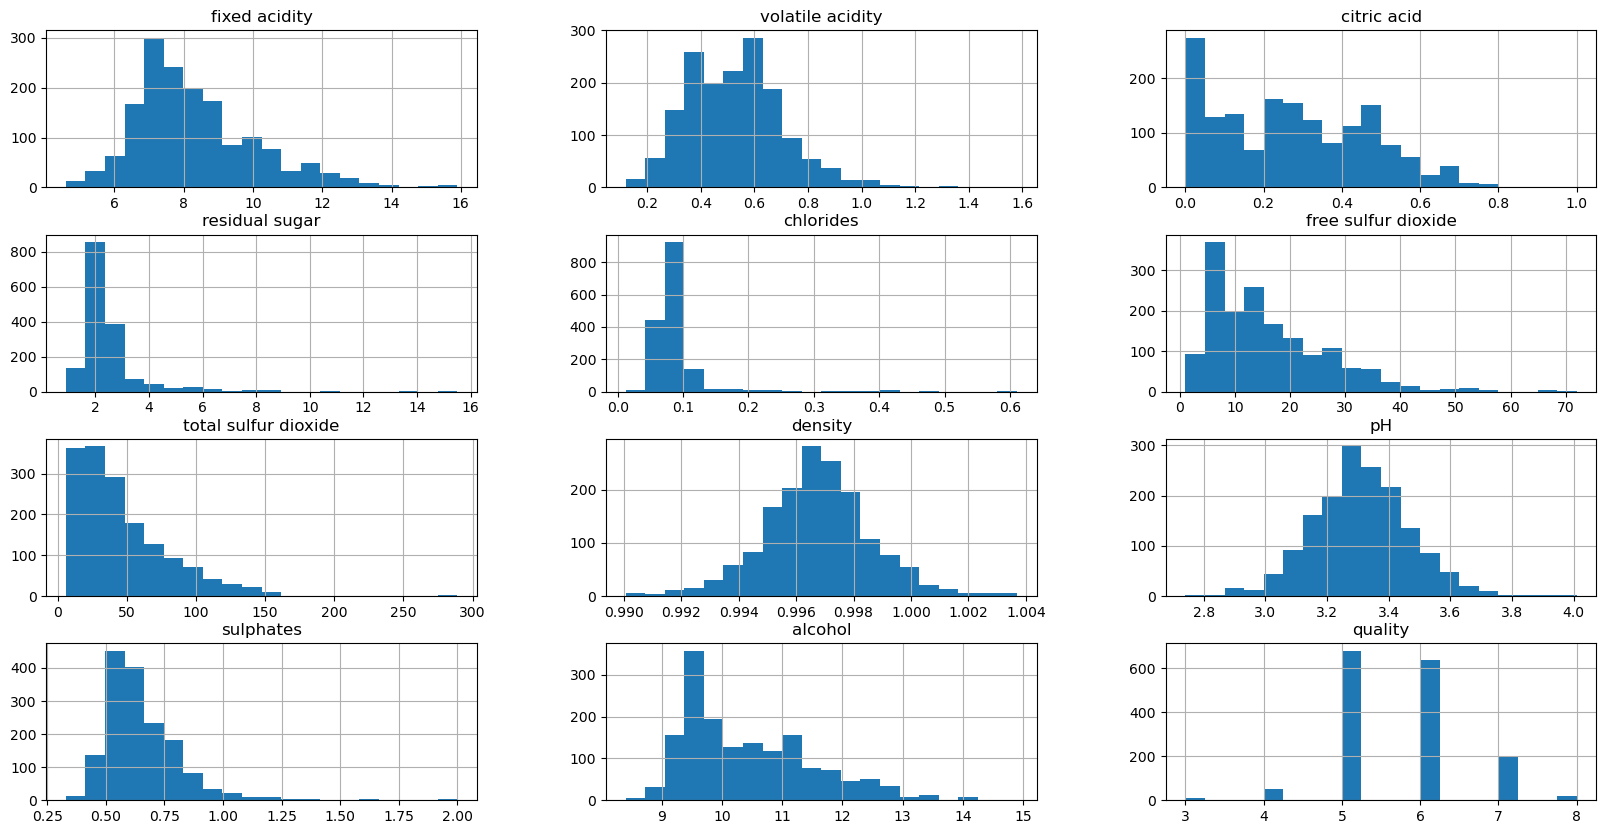

In [8]:
# plt.figure(figsize=(9,8))
input.hist(figsize=(20,10), bins=20)

In [9]:
x = input.iloc[: , :-1]
y = input['quality']
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [10]:
xcopy = x.copy()

***Chuẩn hoá dữ liệu để sử dụng PCA***

In [12]:
scaler = StandardScaler()
columns = x.columns
df_scaled = scaler.fit_transform(x)
scaled_df = pd.DataFrame(df_scaled, columns = columns)
scaled_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [13]:
scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


***Đưa vào PCA***

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(df_scaled)

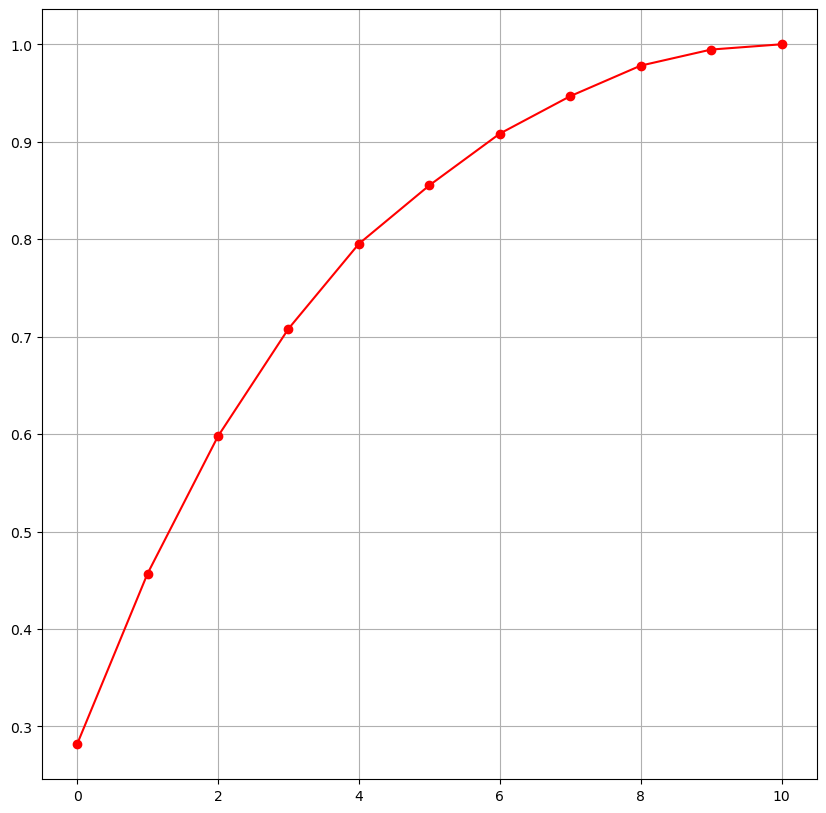

In [20]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [21]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(df_scaled)

In [22]:
print(x_new)

[[-1.61952988  0.45095009 -1.77445415 ... -0.91392069 -0.16104319
  -0.28225828]
 [-0.79916993  1.85655306 -0.91169017 ...  0.92971392 -1.00982858
   0.76258697]
 [-0.74847909  0.88203886 -1.17139423 ...  0.40147313 -0.53955348
   0.59794606]
 ...
 [-1.45612897  0.31174559  1.12423941 ... -0.50640956 -0.23108221
   0.07938219]
 [-2.27051793  0.97979111  0.62796456 ... -0.86040762 -0.32148695
  -0.46887589]
 [-0.42697475 -0.53669021  1.6289552  ... -0.49615364  1.18913227
   0.04217568]]


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25, random_state = 2023)

In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 8)
(1199,)
(400, 8)
(400,)


In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

In [51]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[  1   0   0   2   0   0]
 [  0   1   9   7   0   0]
 [  0   5 118  36   5   0]
 [  0   3  31  97  22   3]
 [  0   2  13  11  27   2]
 [  0   0   1   2   1   1]]
61.25000000000001


In [35]:
print("\n Accuracy of the model is: {} ".format(accuracy_score(y_test,dt_predict)))
print("\n Precision of the model is: {} ".format(precision_score(y_test,dt_predict, average='weighted')))
print("\n Recall of the model is: {} ".format(recall_score(y_test,dt_predict, average='weighted')))
print("\n f1 of the model is: {}".format(f1_score(y_test, dt_predict, average='weighted')))
# precision_recall_curve(ytest,pred)


 Accuracy of the model is: 0.6225 

 Precision of the model is: 0.6117770076110594 

 Recall of the model is: 0.6225 

 f1 of the model is: 0.6139652502857974


In [36]:
results = pd.DataFrame()
results["True"] = y_test
results["Predicted DecisionTree"]=dt_predict

In [37]:
results

,True,Predicted DecisionTree
1521,4,4
14,5,5
265,7,8
1043,7,4
1048,6,6
...,...,...
1248,6,6
336,6,6
182,5,5
882,6,7


In [38]:
from sklearn import tree

In [52]:
text_present = tree.export_text(dt)
print(text_present)

|--- feature_1 <= 0.75
|   |--- feature_2 <= 0.16
|   |   |--- feature_2 <= -1.37
|   |   |   |--- feature_0 <= -0.19
|   |   |   |   |--- feature_4 <= 1.81
|   |   |   |   |   |--- feature_0 <= -2.45
|   |   |   |   |   |   |--- feature_4 <= 1.05
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- feature_4 >  1.05
|   |   |   |   |   |   |   |--- feature_3 <= 0.13
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- feature_3 >  0.13
|   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_0 >  -2.45
|   |   |   |   |   |   |--- feature_2 <= -2.64
|   |   |   |   |   |   |   |--- feature_0 <= -1.30
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- feature_0 >  -1.30
|   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- feature_2 >  -2.64
|   |   |   |   |   |   |   |--- feature_3 <= 0.24
|   |   |   |   |   |   |   |   |--- feature_6 <= 1.01
|   |   |   |   |   |   |  

In [53]:
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
class_name = ['Cuc Te','Te', 'Trung Binh', 'Trung Binh Kha', 'Kha', 'Tot']


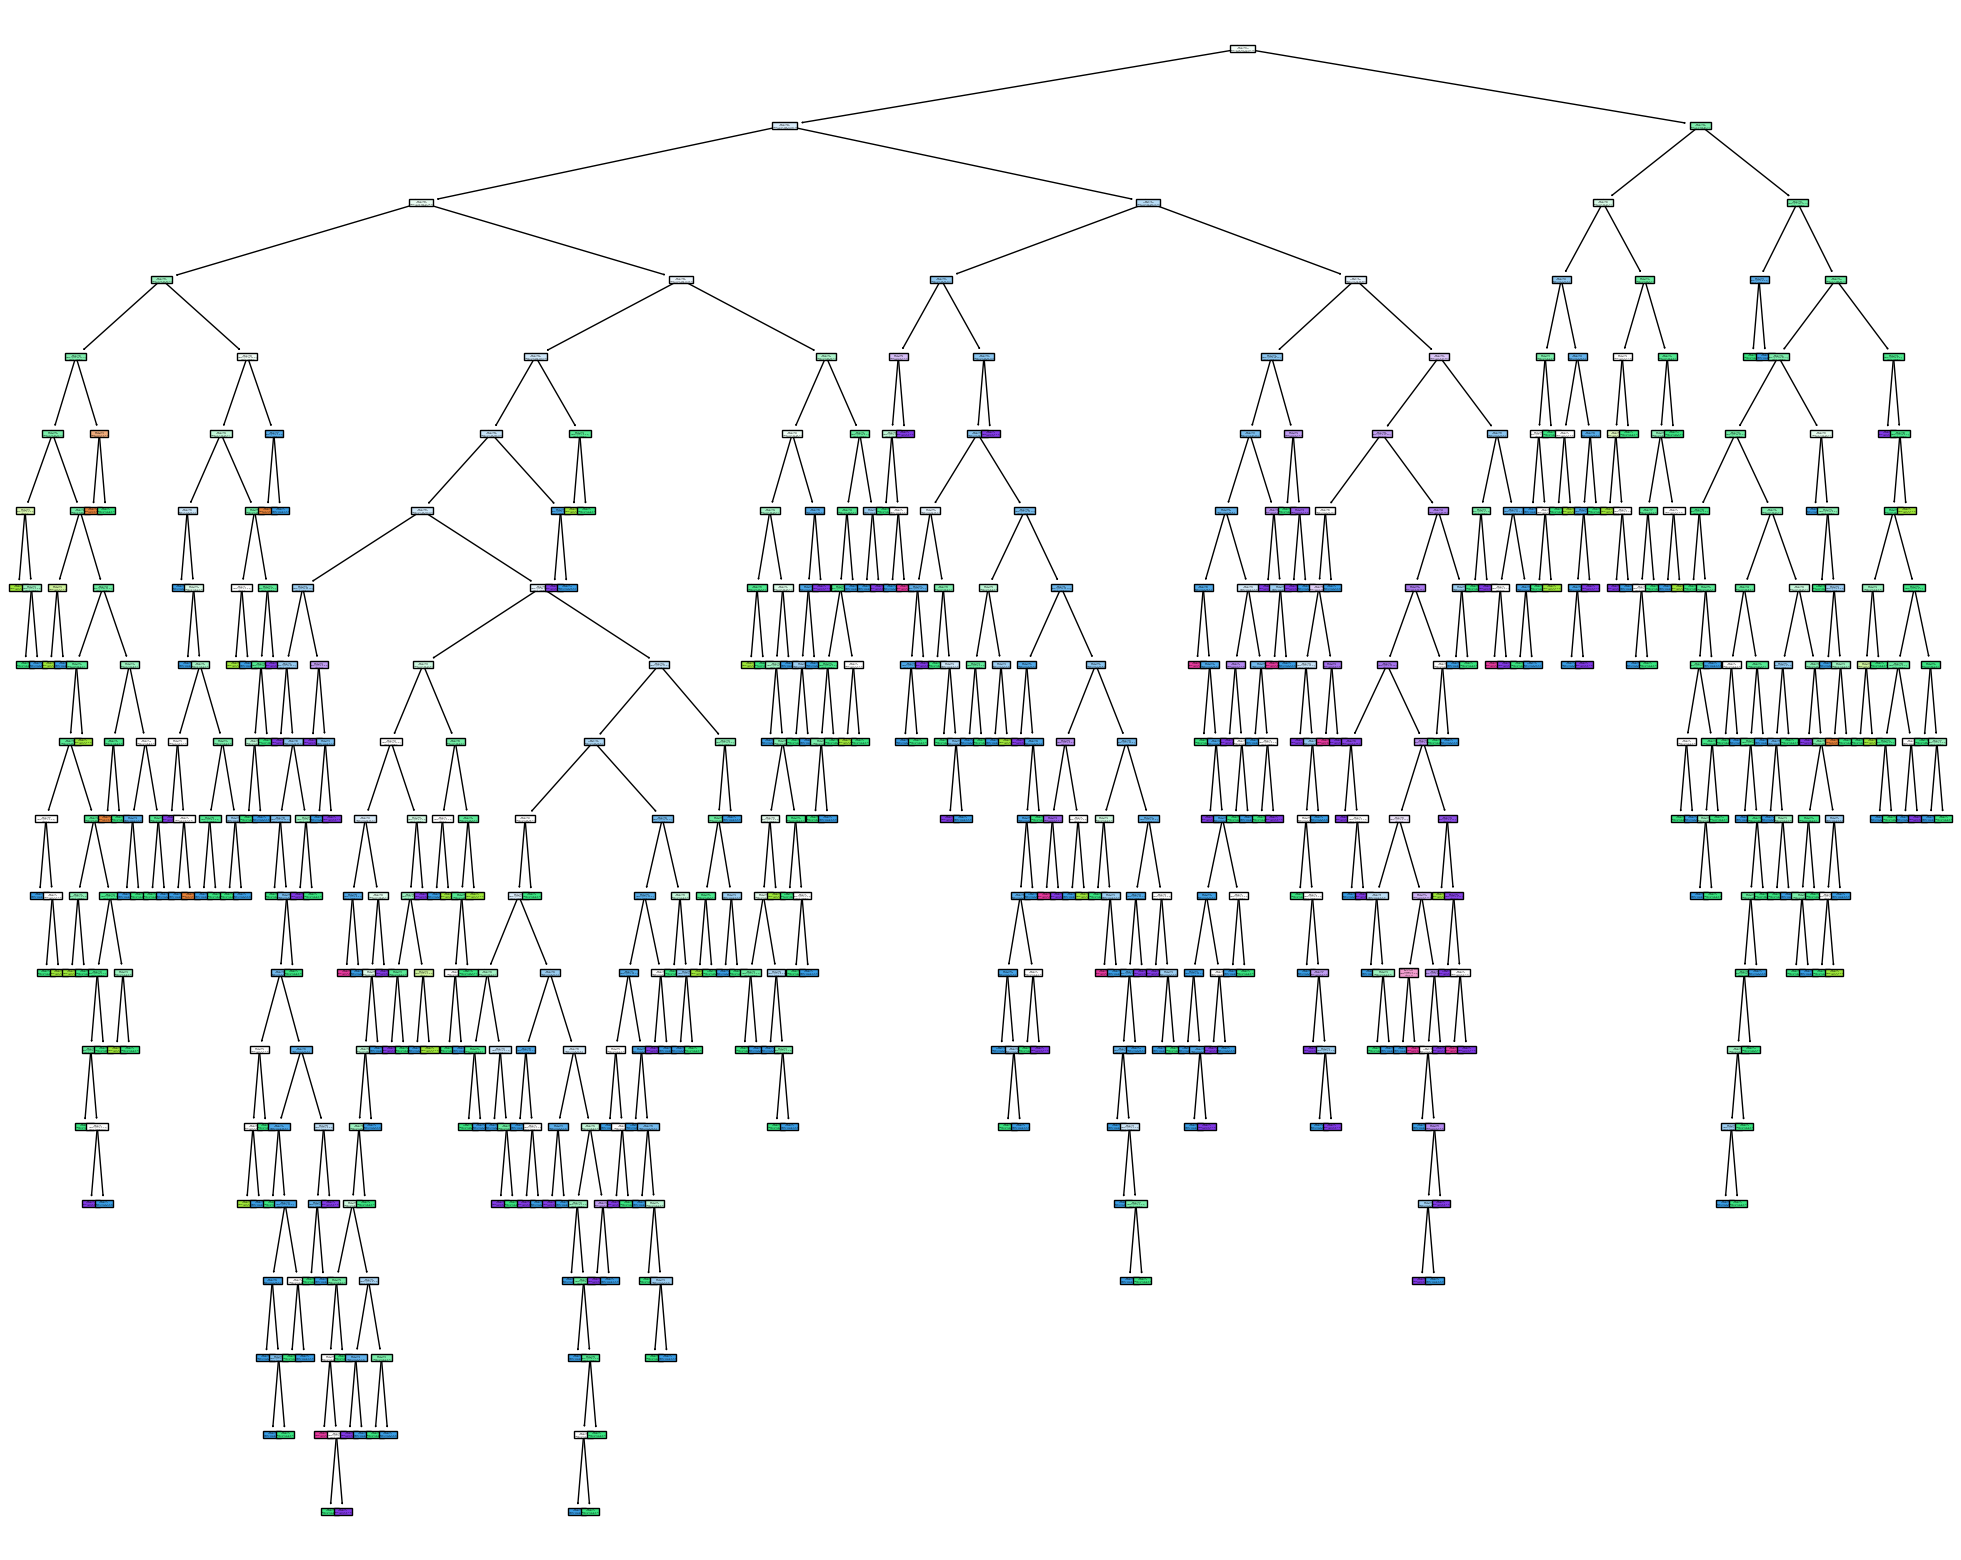

In [59]:
# Setting dpi = 300 to make image clearer than default
fig = plt.figure(figsize=(25,20))

tree.plot_tree(dt, feature_names = feature_names, class_names=class_name, filled = True);
